Source:

https://docs.python.org/3/library/codecs.html#standard-encodings

https://www.kaggle.com/devghiles/step-by-step-solution-with-f1-score-as-a-metric

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

To rename:
https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

To change cols:
https://stackoverflow.com/questions/12329853/how-to-rearrange-pandas-column-sequence/23741704

https://rajacsp.github.io/mlnotes/python/data-wrangling/advanced-custom-lambda/


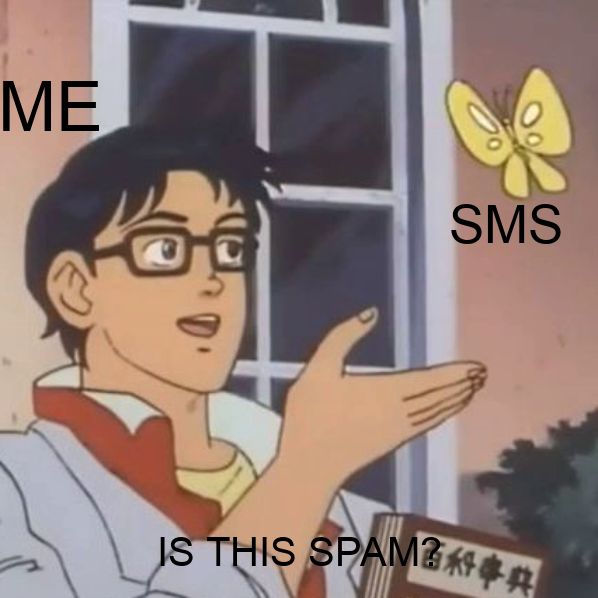

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
FILEPATH = '/kaggle/input/sms-spam-collection-dataset/spam.csv'

In [ ]:
df = pd.read_csv(FILEPATH, encoding='cp852', engine = 'c') # engine 'c' used instead of 'python' for higher performance
df.head(5)

In [ ]:
# delete unnecessary cols
cols = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df.drop(cols, axis = 1, inplace = True)

In [ ]:
df.head()

In [ ]:
# Title change v1 = result, v2 = input

df.columns = ['result', 'input']

# we can also use df.rename() option here

In [ ]:
df.head()

In [ ]:
# reorder options - must be applicable for all cols
df = df[['input','result']]
 

In [ ]:
df.head()

In [ ]:
# Buggy, please don't use
new_cols = ['my_input', 'my_result']

df1 = df.reindex(columns = new_cols)
# df1.to_csv(FILEPATH)
# df1.head()

In [ ]:
# Rename cols by using .rename - can be used for selected cols

df.rename(columns = {'input' : 'my_new_input', 'result' : 'my_new_result'}, inplace = True)

In [ ]:
df.head()

In [ ]:
df.count()

In [ ]:
# print first string

df.iloc[1][0]

In [ ]:
df.iloc[2][0]

In [ ]:
def find_message_length(msg):
    
    msg_words = msg.split(' ')
    
    msg_len = len(msg_words)
    
    return msg_len

In [ ]:
print(find_message_length(df.iloc[0][0]))

In [ ]:
# Create a new col called 'message_word_length' showing how many words in the message
df['input_words_count'] = df['my_new_input'].apply(find_message_length)
df.head()

# ref: https://rajacsp.github.io/mlnotes/python/data-wrangling/advanced-custom-lambda/

In [ ]:
# show the unique labels

set(df['my_new_result'])

In [ ]:
def find_length(msg):
    
    msg_len = len(msg)
    
    return msg_len

In [ ]:
print(find_length(df.iloc[0][0]))

In [ ]:
# Create a new col called 'message_word_length' showing how many words in the message
df['input_char_length'] = df['my_new_input'].apply(find_length)
df.head()

In [ ]:
# History words count

import matplotlib.pyplot as plt

# to avoid popups use inline
%matplotlib inline 

In [ ]:
# plt.hist(data['label'], bins=3, weights=np.ones(len(data['label'])) / len(data['label']))

import numpy as np

plt.hist(df['input_words_count'], bins = 100, weights = np.ones(len(df['input_words_count'])) / len(df['input_words_count']))

plt.xlabel('Word Length')
plt.ylabel('Group Count')
plt.title('Word Length Histogram')

In [ ]:
# Find more than 80 words
df['input_words_count']

In [ ]:
df_above_80 = df[df['input_words_count'] > 80]

In [ ]:
df_above_80

In [ ]:
import numpy as np

plt.hist(df['input_char_length'], bins = 100, weights = np.ones(len(df['input_char_length'])) / len(df['input_char_length']))

plt.xlabel('Char Length')
plt.ylabel('Group Count')
plt.title('Char Length Histogram')

In [ ]:
spams = df['my_new_input'].iloc[(df['my_new_result'] == 'spam').values]
hams = df['my_new_input'].iloc[(df['my_new_result'] == 'ham').values]
print(spams[:10])
print(hams[:10])

Tokenisation

In [ ]:
import spacy

In [ ]:
#Spacy implementation of NLTK given in example
nlp = spacy.load('en')

In [ ]:
def normalize(msg):
    
    doc = nlp(msg)
    res=[]
    
    for token in doc:
        if(token.is_stop or token.is_digit or token.is_punct or not(token.is_oov)):
            pass
        else:
            res.append(token.lemma_.lower())
    
    return res

In [ ]:
#Stop words removal
for word in spams:
    word = normalize(word)

for word in hams:
    word = normalize(word)

print(spams)
print(hams)

In [ ]:
from collections import Counter

In [ ]:
def tokenise(words):
    res = []
    
    for word in words:
        doc = nlp(word)
        
        for token in doc:
            res.append(token.text)
    return res

In [ ]:
spam_tokens = tokenise(spams)
ham_tokens = tokenise(hams)

In [ ]:
spam_most_common = Counter(spam_tokens).most_common(25)

ham_most_common = Counter(ham_tokens).most_common(25)
#Method did not work
'''
for word in spams:
    spam_most_common.append(most_common(word))
'''
print(spam_most_common)

print(ham_most_common)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tr, te = train_test_split(df, test_size = 0.2)
print("Training set length:", len(tr))
print("Test set length:", len(te))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
#Can be called by using binary = True in Count Vectorizer
bin_vectorizer = CountVectorizer(binary=True)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
def feature_extraction(msg):
    
    matrix = pd.DataFrame(tfidf_vectorizer.fit_transform(msg).toarray(),columns=tfidf_vectorizer.get_feature_names(),index=None)
    
    return matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['my_new_result'] = df['my_new_result'].map({'ham':0,'spam':1})

In [ ]:
k = feature_extraction(df['my_new_input'])

print(k.shape, df['my_new_result'].shape)

In [ ]:
tr_x, tr_y, te_x, te_y = train_test_split(k, df['my_new_result'], test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
classifiers = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100,100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [ ]:
f1_scores = dict()

for classifier in classifiers:
    
    clf = classifiers[classifier]
    clf.fit(tr_x,te_x)
    y_pred = clf.predict(tr_y)
    f1_scores[classifier] = f1_score(y_pred, te_y)
    print(classifier, f1_scores[classifier])

In [ ]:
possible_solvers = ['lbfgs', 'sgd', 'adam']
m_f1_score = float('-inf')
best_solver = None

for solver in possible_solvers:
    classifier = MLPClassifier(solver = solver)
    classifier.fit(tr_x, te_x)
    y_pred = classifier.predict(tr_y)
    curr_f1_score = f1_score(y_pred, te_y)
    if curr_f1_score > m_f1_score:
        m_f1_score = curr_f1_score
        best_solver = solver
        
print(best_solver,'is the best one')

In [ ]:
alphas = [i * 0.1 for i in range(11)]
m_f1_score = float('-inf')
best_alpha = None

for alpha in alphas:
    
    classifier = MLPClassifier(solver = 'lbfgs')
    classifier.fit(tr_x, te_x)
    y_pred = classifier.predict(tr_y)
    curr_f1_score = f1_score(y_pred, te_y)
    if curr_f1_score > m_f1_score:
        m_f1_score = curr_f1_score
        best_alpha = alpha
        
print("Best alpha is",best_alpha,"and highest f1_score is",m_f1_score)

**Prediction Time**

In [ ]:
classifier = MLPClassifier(solver = 'lbfgs', alpha=0.2)
#Maybe change this based on hyperparameter tuning
classifier.fit(tr_x, te_x)
y_pred = classifier.predict(tr_y)
print(confusion_matrix(y_pred, te_y))

In [ ]:
import seaborn as sns

In [ ]:
sns.regplot(x=te_y, y=y_pred, marker="*")

**Testing 1, 2, 3**

In [ ]:
txt = ""